# Chicago Divvy Bike-sharing program bike usage prediction.

## Team members
**Hang Tian**\
github id:ht6631

Mengqi Li\
github id:Adalmqqqq

Vaishnavi Meka\
github id:vaishnavimeka27

## Overview
#### - What are you trying to do? Articulate your objectives using absolutely no jargon.
We are working on this project that combines weather data, holiday information and aggregated bike trip data (as trip counts) to predict bike usage daily of the bike-sharing program (divvy) in Chicago, IL.

#### - What is new in your approach and why do you think it will be successful? 
Instead of merely aggregating bike trip data periodically with weather data, we added other features like user type (member or non-member), bike type and geographic information.

#### - Who cares? If you are successful, what difference will it make? Importantly, who is your primary stakeholder, and what specific need are you addressing?
Our main stakeholder is the Chicago Department of Transportation (CDOT). Our predicted bike usage information can not only guide the planning and allocation of shared bike resources, but also support futural decisions about where to expand or adjust services to integrate with other modes of transportation. To summarize, our project could help optimize the city’s bike-sharing infrastructure.

## Data
#### 1. Bike-sharing trip data: https://divvybikes.com/system-data  ->  https://divvy-tripdata.s3.amazonaws.com/index.html
Since the Divvy bike-sharing program is ran by CDOT (Chicago Department of Transportation), this dataset is highly reliable. We used bike trip data from 2022 to 2023 for this project.
#### 2. Chicago neighbourhoods shapefile: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Neighborhoods/bbvz-uum9
This dataset comes from Chicago open data portal, it's well maintained by Chicago government and highly reliable .
#### 3. Holiday information
#### 4. Daily weather data

## Preprocessing

#### 1. Aggregation of bike trips

The original bike trip data is one row per one trip records including member type, bike type, start and end time and location. If the start or end location is at stations, that information will be recorded in related variables such as "start_station_id", "end_station_id".\

The image attached below depict how the original data looks like.

<img src="Images/bike_trip.png" alt="Original bike trip data" />

#### 2. Geographic aggregation

We first plan to aggregate them as hourly usage counts with date information, also group by user type, bike types as features. Besides, we have concidered aggregating the records with their start and end locations.

Most of the trips are both started and ended at stations (about 80%) while there are records either not start or end at stations. There are 2000+ unique bike stations involved in these records. That will be a huge number of combination of we aggregate trips per stations (start and end), so we first overlapped the stations with Chicago neighbourhoods. Below are the maps. The value of legend shows how many total start and end cases happened at the very station or within each polygon.

<img src="Images/Bike_stations.png" alt="Bike stations over Chicago" />

<img src="Images/Chicago_neighbor.png" alt="Total Usage Counts per neighbourhoods" />

Among these neighbourhoods, five of these neighborhoods clearly have significantly higher usage counts compared to the others as the box plot shows. They are identified as hot zones. Further geographic aggregation of bike tirps will count on if the start and end points are within these hot zones.

<img src="Images/boxplot.png" alt="Boxplot of usage sum within each neighborhoods" />

<img src="Images/hotzone_stations.png" alt="Stations within Hot zones" />

#### 3. Merging with holiday information and weather data

For everyday in 2022 and 2023, we labeld if it is during weekday and if that day is a holiday when people don't need to work. The aggregated table is shown as below.

In [3]:
import pandas as pd
usage_count=pd.read_csv('data/usage_count_date.csv')
usage_count.drop('Unnamed: 0',axis=1,inplace=True)
usage_count

,rideable_type,member_casual,date,hour,start_in_hot_zones,end_in_hot_zones,at_stations,count,ISweekday,ISholiday
0,classic_bike,casual,2022-01-01,0,0.0,0.0,1,22,0,1
1,classic_bike,casual,2022-01-01,0,0.0,1.0,1,7,0,1
2,classic_bike,casual,2022-01-01,0,1.0,0.0,1,6,0,1
3,classic_bike,casual,2022-01-01,0,1.0,1.0,1,14,0,1
4,classic_bike,casual,2022-01-01,1,0.0,0.0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...
333304,electric_bike,member,2023-12-31,23,0.0,0.0,1,9,0,0
333305,electric_bike,member,2023-12-31,23,0.0,1.0,1,2,0,0
333306,electric_bike,member,2023-12-31,23,1.0,0.0,1,1,0,0
333307,electric_bike,member,2023-12-31,23,1.0,1.0,0,12,0,0


Besides, the daily weather data for year 2022 and 2023 are retrieved and saved as csv files in "data" folder

In [4]:
weather_2022=pd.read_csv('data/chicago2022.csv')
weather_2022.drop('name',axis=1,inplace=True)
weather_2023=pd.read_csv('data/chicago2023.csv')
weather_2023.drop('name',axis=1,inplace=True)
weather_2023.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2023-01-01,44.2,37.1,41.1,41.3,32.0,38.1,38.1,89.1,0.115,...,2.0,1,10,2023-01-01T07:18:22,2023-01-01T16:30:02,0.32,"Rain, Overcast",Cloudy skies throughout the day with early mor...,rain,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
1,2023-01-02,43.1,31.9,38.1,39.6,31.5,34.7,35.3,90.0,0.000,...,2.2,1,10,2023-01-02T07:18:26,2023-01-02T16:30:54,0.36,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,F7086,..."
2,2023-01-03,46.6,39.4,42.9,45.2,32.6,39.4,41.7,95.4,0.952,...,0.8,1,10,2023-01-03T07:18:29,2023-01-03T16:31:48,0.39,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"72534014819,KORD,KMDW,72530094846,F1983,F7086,..."
3,2023-01-04,45.1,33.5,37.0,41.3,25.4,30.8,32.2,82.7,0.008,...,0.6,0,10,2023-01-04T07:18:29,2023-01-04T16:32:44,0.42,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"72534014819,KORD,KMDW,72530094846,F1983,F7086,..."
4,2023-01-05,34.2,32.1,33.0,28.5,22.7,25.4,28.0,81.5,0.004,...,1.5,1,10,2023-01-05T07:18:26,2023-01-05T16:33:41,0.46,"Snow, Rain, Overcast",Cloudy skies throughout the day with morning r...,snow,"72534014819,KORD,KMDW,72530094846,F1983,F7086,..."


In [5]:
weather = pd.concat([weather_2022, weather_2023], ignore_index=True)
weather.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2022-01-01,40.9,29.6,34.8,33.4,16.7,24.3,29.7,81.7,0.090,...,0.5,0,NaN,2022-01-01T07:18:23,2022-01-01T16:30:14,0.96,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
1,2022-01-02,29.1,15.9,23.5,20.7,6.8,13.0,16.1,73.1,0.032,...,2.7,2,NaN,2022-01-02T07:18:27,2022-01-02T16:31:07,0.00,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,snow,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
2,2022-01-03,23.5,10.3,17.2,13.2,-0.2,6.9,5.7,61.3,0.000,...,5.0,3,NaN,2022-01-03T07:18:28,2022-01-03T16:32:01,0.03,Clear,Clear conditions throughout the day.,clear-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
3,2022-01-04,35.4,23.4,29.8,25.2,12.8,19.8,19.5,65.3,0.000,...,3.7,2,NaN,2022-01-04T07:18:28,2022-01-04T16:32:57,0.06,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
4,2022-01-05,34.7,13.4,19.7,24.2,-6.4,3.7,10.3,66.4,0.000,...,3.5,2,NaN,2022-01-05T07:18:25,2022-01-05T16:33:54,0.10,Overcast,Cloudy skies throughout the day.,cloudy,"72534014819,KORD,KMDW,72530094846,F1983,744665..."


In [6]:
weather

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2022-01-01,40.9,29.6,34.8,33.4,16.7,24.3,29.7,81.7,0.090,...,0.5,0,NaN,2022-01-01T07:18:23,2022-01-01T16:30:14,0.96,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
1,2022-01-02,29.1,15.9,23.5,20.7,6.8,13.0,16.1,73.1,0.032,...,2.7,2,NaN,2022-01-02T07:18:27,2022-01-02T16:31:07,0.00,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,snow,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
2,2022-01-03,23.5,10.3,17.2,13.2,-0.2,6.9,5.7,61.3,0.000,...,5.0,3,NaN,2022-01-03T07:18:28,2022-01-03T16:32:01,0.03,Clear,Clear conditions throughout the day.,clear-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
3,2022-01-04,35.4,23.4,29.8,25.2,12.8,19.8,19.5,65.3,0.000,...,3.7,2,NaN,2022-01-04T07:18:28,2022-01-04T16:32:57,0.06,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
4,2022-01-05,34.7,13.4,19.7,24.2,-6.4,3.7,10.3,66.4,0.000,...,3.5,2,NaN,2022-01-05T07:18:25,2022-01-05T16:33:54,0.10,Overcast,Cloudy skies throughout the day.,cloudy,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27,43.4,31.3,38.2,37.0,29.1,33.1,31.5,76.9,0.000,...,1.8,1,10.0,2023-12-27T07:17:20,2023-12-27T16:25:58,0.52,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
726,2023-12-28,42.8,37.3,40.0,37.5,30.1,33.4,35.7,84.7,0.119,...,1.0,1,10.0,2023-12-28T07:17:37,2023-12-28T16:26:41,0.56,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
727,2023-12-29,42.8,32.3,39.6,37.1,28.2,33.2,36.7,89.2,0.106,...,0.8,0,10.0,2023-12-29T07:17:51,2023-12-29T16:27:25,0.59,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
728,2023-12-30,37.5,28.2,33.1,33.5,21.4,26.9,29.6,86.8,0.000,...,2.2,1,10.0,2023-12-30T07:18:03,2023-12-30T16:28:12,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."


In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          730 non-null    object 
 1   tempmax           730 non-null    float64
 2   tempmin           730 non-null    float64
 3   temp              730 non-null    float64
 4   feelslikemax      730 non-null    float64
 5   feelslikemin      730 non-null    float64
 6   feelslike         730 non-null    float64
 7   dew               730 non-null    float64
 8   humidity          730 non-null    float64
 9   precip            730 non-null    float64
 10  precipprob        730 non-null    int64  
 11  precipcover       730 non-null    float64
 12  preciptype        304 non-null    object 
 13  snow              730 non-null    float64
 14  snowdepth         730 non-null    float64
 15  windgust          729 non-null    float64
 16  windspeed         730 non-null    float64
 1

In [8]:
usage_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333309 entries, 0 to 333308
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       333309 non-null  object 
 1   member_casual       333309 non-null  object 
 2   date                333309 non-null  object 
 3   hour                333309 non-null  int64  
 4   start_in_hot_zones  333309 non-null  float64
 5   end_in_hot_zones    333309 non-null  float64
 6   at_stations         333309 non-null  int64  
 7   count               333309 non-null  int64  
 8   ISweekday           333309 non-null  int64  
 9   ISholiday           333309 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 25.4+ MB


In [9]:
usage_count['date'] = pd.to_datetime(usage_count['date']).dt.date
weather['datetime'] = pd.to_datetime(weather['datetime']).dt.date

In [10]:
data = pd.merge(usage_count, weather, left_on='date', right_on='datetime', how='inner')
data.drop('datetime', axis=1, inplace=True)
data.head()

,rideable_type,member_casual,date,hour,start_in_hot_zones,end_in_hot_zones,at_stations,count,ISweekday,ISholiday,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,classic_bike,casual,2022-01-01,0,0.0,0.0,1,22,0,1,...,0.5,0,NaN,2022-01-01T07:18:23,2022-01-01T16:30:14,0.96,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
1,classic_bike,casual,2022-01-01,0,0.0,1.0,1,7,0,1,...,0.5,0,NaN,2022-01-01T07:18:23,2022-01-01T16:30:14,0.96,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
2,classic_bike,casual,2022-01-01,0,1.0,0.0,1,6,0,1,...,0.5,0,NaN,2022-01-01T07:18:23,2022-01-01T16:30:14,0.96,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
3,classic_bike,casual,2022-01-01,0,1.0,1.0,1,14,0,1,...,0.5,0,NaN,2022-01-01T07:18:23,2022-01-01T16:30:14,0.96,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
4,classic_bike,casual,2022-01-01,1,0.0,0.0,0,2,0,1,...,0.5,0,NaN,2022-01-01T07:18:23,2022-01-01T16:30:14,0.96,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333309 entries, 0 to 333308
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       333309 non-null  object 
 1   member_casual       333309 non-null  object 
 2   date                333309 non-null  object 
 3   hour                333309 non-null  int64  
 4   start_in_hot_zones  333309 non-null  float64
 5   end_in_hot_zones    333309 non-null  float64
 6   at_stations         333309 non-null  int64  
 7   count               333309 non-null  int64  
 8   ISweekday           333309 non-null  int64  
 9   ISholiday           333309 non-null  int64  
 10  tempmax             333309 non-null  float64
 11  tempmin             333309 non-null  float64
 12  temp                333309 non-null  float64
 13  feelslikemax        333309 non-null  float64
 14  feelslikemin        333309 non-null  float64
 15  feelslike           333309 non-nul

## Exploratory Data Analysis

In [12]:
data.shape

(333309, 41)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333309 entries, 0 to 333308
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       333309 non-null  object 
 1   member_casual       333309 non-null  object 
 2   date                333309 non-null  object 
 3   hour                333309 non-null  int64  
 4   start_in_hot_zones  333309 non-null  float64
 5   end_in_hot_zones    333309 non-null  float64
 6   at_stations         333309 non-null  int64  
 7   count               333309 non-null  int64  
 8   ISweekday           333309 non-null  int64  
 9   ISholiday           333309 non-null  int64  
 10  tempmax             333309 non-null  float64
 11  tempmin             333309 non-null  float64
 12  temp                333309 non-null  float64
 13  feelslikemax        333309 non-null  float64
 14  feelslikemin        333309 non-null  float64
 15  feelslike           333309 non-nul

In [16]:
data.columns

Index(['rideable_type', 'member_casual', 'date', 'hour', 'start_in_hot_zones',
       'end_in_hot_zones', 'at_stations', 'count', 'ISweekday', 'ISholiday',
       'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [17]:
#picking most useful columns as per common sense, Coz all weather related features aren't usefull to common people while booking a ride or going out for any activity.
#most common weather useful for people would be temp, snow, feels like, visibility.

columns_useful = ['rideable_type', 'member_casual', 'date', 'hour', 'start_in_hot_zones',
       'end_in_hot_zones', 'at_stations', 'count', 'ISweekday', 'ISholiday','temp', 'feelslike', 'snow', 'visibility']



In [19]:
data_temp = data[columns_useful]

In [20]:
data_temp.head()

,rideable_type,member_casual,date,hour,start_in_hot_zones,end_in_hot_zones,at_stations,count,ISweekday,ISholiday,temp,feelslike,snow,visibility
0,classic_bike,casual,2022-01-01,0,0.0,0.0,1,22,0,1,34.8,24.3,0.3,4.6
1,classic_bike,casual,2022-01-01,0,0.0,1.0,1,7,0,1,34.8,24.3,0.3,4.6
2,classic_bike,casual,2022-01-01,0,1.0,0.0,1,6,0,1,34.8,24.3,0.3,4.6
3,classic_bike,casual,2022-01-01,0,1.0,1.0,1,14,0,1,34.8,24.3,0.3,4.6
4,classic_bike,casual,2022-01-01,1,0.0,0.0,0,2,0,1,34.8,24.3,0.3,4.6


In [48]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333309 entries, 0 to 333308
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       333309 non-null  object 
 1   member_casual       333309 non-null  object 
 2   date                333309 non-null  object 
 3   hour                333309 non-null  int64  
 4   start_in_hot_zones  333309 non-null  float64
 5   end_in_hot_zones    333309 non-null  float64
 6   at_stations         333309 non-null  int64  
 7   count               333309 non-null  int64  
 8   ISweekday           333309 non-null  int64  
 9   ISholiday           333309 non-null  int64  
 10  temp                333309 non-null  float64
 11  feelslike           333309 non-null  float64
 12  snow                333309 non-null  float64
 13  visibility          333309 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 35.6+ MB


In [49]:
#fixing data types

data_temp['start_in_hot_zones'] = data_temp['start_in_hot_zones'].astype('category')
data_temp['end_in_hot_zones'] = data_temp['end_in_hot_zones'].astype('category')
data_temp['at_stations'] = data_temp['at_stations'].astype('category')
data_temp['ISweekday'] = data_temp['ISweekday'].astype('category')
data_temp['ISholiday'] = data_temp['ISholiday'].astype('category')


data_temp['rideable_type'] = data_temp['rideable_type'].astype('category')
data_temp['member_casual'] = data_temp['member_casual'].astype('category')



/tmp/ipykernel_5488/862991960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp['start_in_hot_zones'] = data_temp['start_in_hot_zones'].astype('category')
/tmp/ipykernel_5488/862991960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp['end_in_hot_zones'] = data_temp['end_in_hot_zones'].astype('category')
/tmp/ipykernel_5488/862991960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [50]:
data_temp.to_csv("/workspaces/707-group-project-ht6631/project-checkpoint2/data/eda_ready_data.csv", header=True, index=False)
### Saving the data to data folder for persistance

In [51]:
df = data_temp.copy()


In [52]:
print(df.isnull().sum())
## No null values present

rideable_type         0
member_casual         0
date                  0
hour                  0
start_in_hot_zones    0
end_in_hot_zones      0
at_stations           0
count                 0
ISweekday             0
ISholiday             0
temp                  0
feelslike             0
snow                  0
visibility            0
dtype: int64


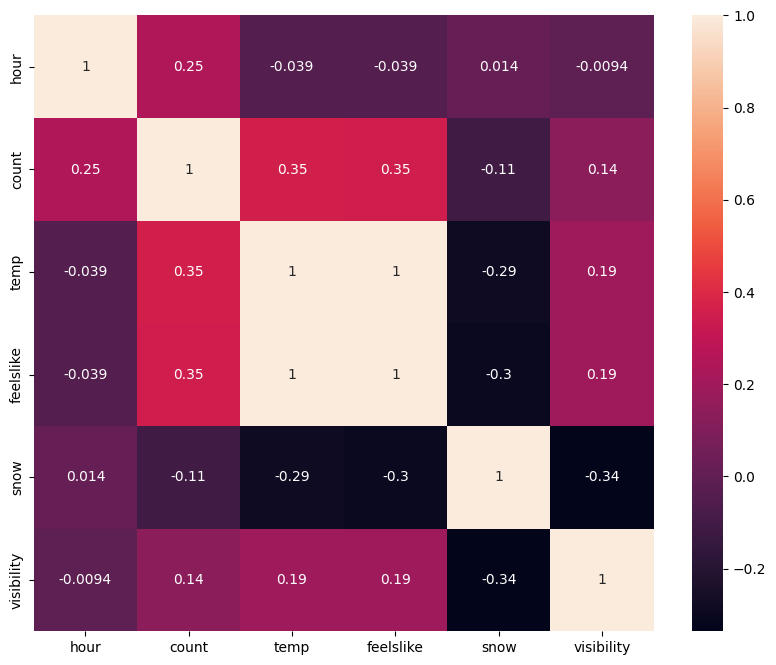

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



numerical_df = df.select_dtypes(include=[np.number])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True)
plt.show()


#### Can observe strong co-relation to some attributes, like feels temparature and feels like can remove this feels like from our analysis as this can introduce multi-collenearity


In [54]:
df = df.drop(columns=['feelslike'])


In [55]:
df.shape

(333309, 13)

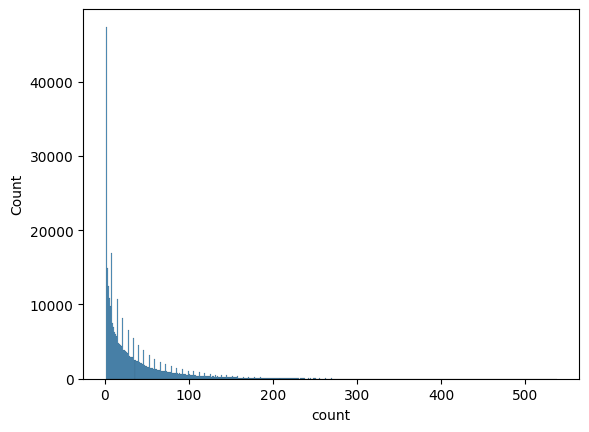

In [56]:
# Distribution of count_of_rides
sns.histplot(df['count'])

plt.show()

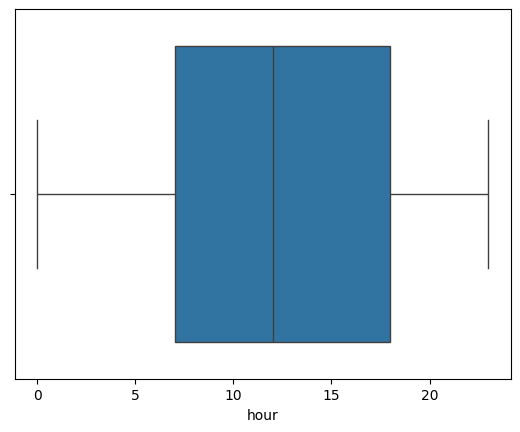

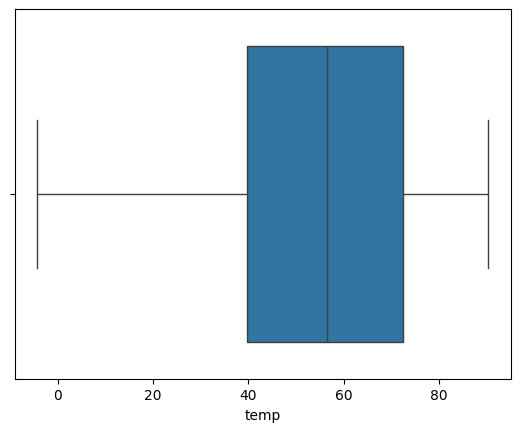

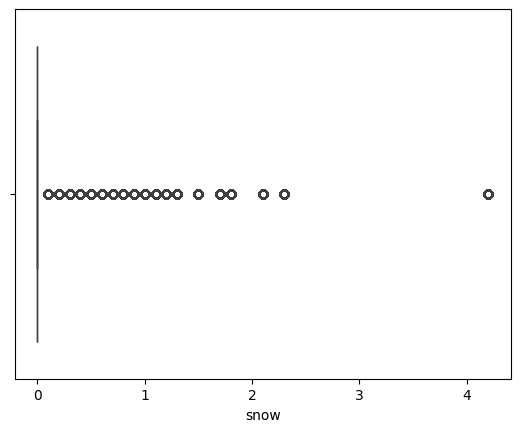

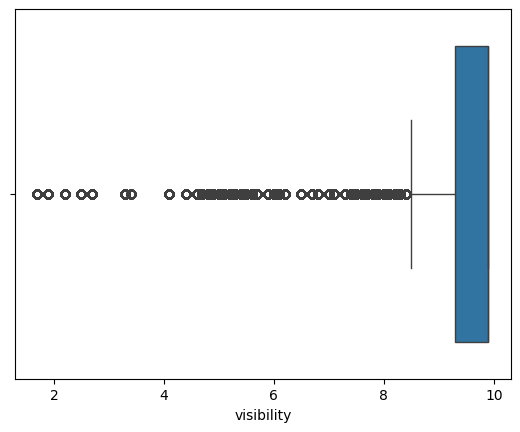

In [57]:
numerical_features = ['hour', 'temp', 'snow', 'visibility']
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.show()


In [35]:
##### Seems there are outliers in visibility in snow, probably, chicago being an city where weather can be abnormal its normal to see thee outliers 

In [61]:
df.dtypes

rideable_type         category
member_casual         category
date                    object
hour                     int64
start_in_hot_zones    category
end_in_hot_zones      category
at_stations           category
count                    int64
ISweekday             category
ISholiday             category
temp                   float64
snow                   float64
visibility             float64
dtype: object

In [60]:

cat_variables = ['rideable_type', 'member_casual', 'start_in_hot_zones', 'end_in_hot_zones', 'at_stations', 'ISweekday', 'ISholiday']

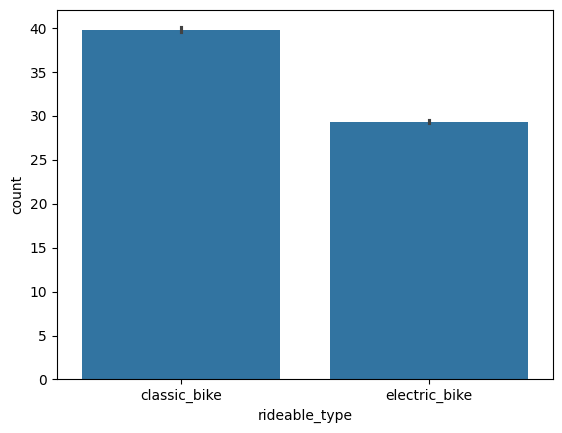

In [62]:
# Categorical data analysis
sns.barplot(x='rideable_type', y='count', data=df)
plt.show()



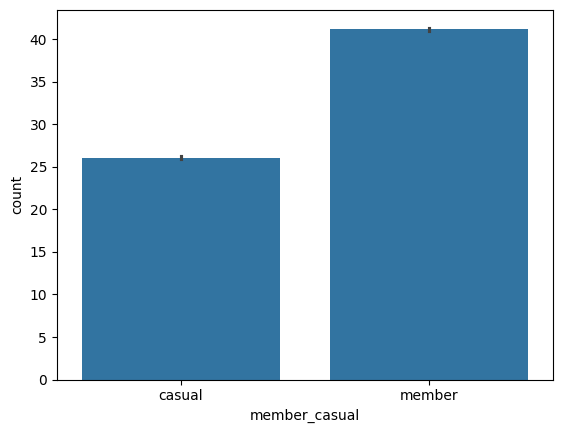

In [63]:
sns.barplot(x='member_casual', y='count', data=df)
plt.show()

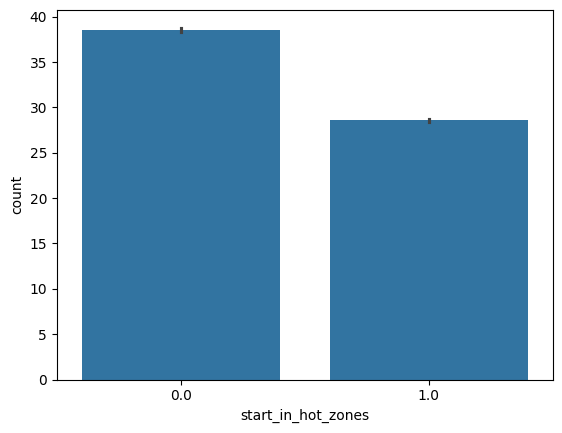

In [64]:
sns.barplot(x='start_in_hot_zones', y='count', data=df)
plt.show()

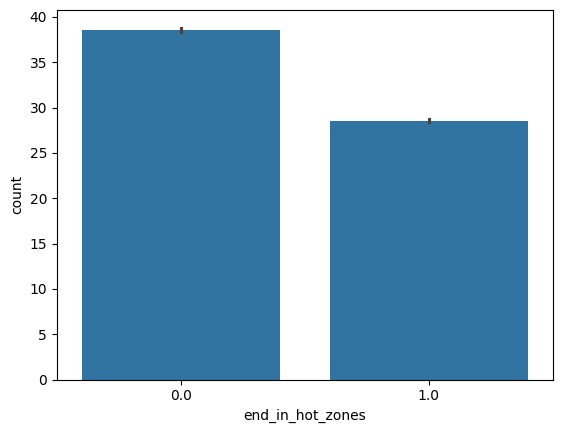

In [65]:
sns.barplot(x='end_in_hot_zones', y='count', data=df)
plt.show()

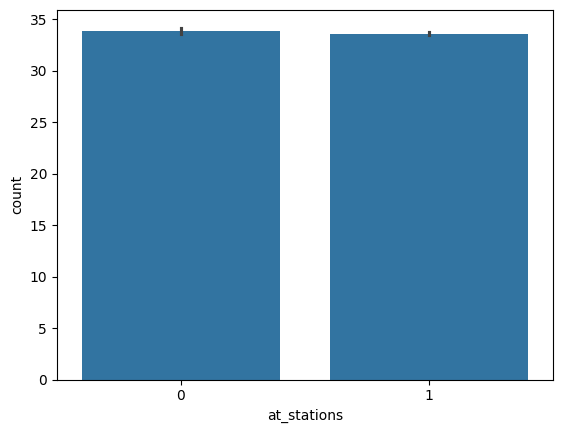

In [66]:
sns.barplot(x='at_stations', y='count', data=df)
plt.show()

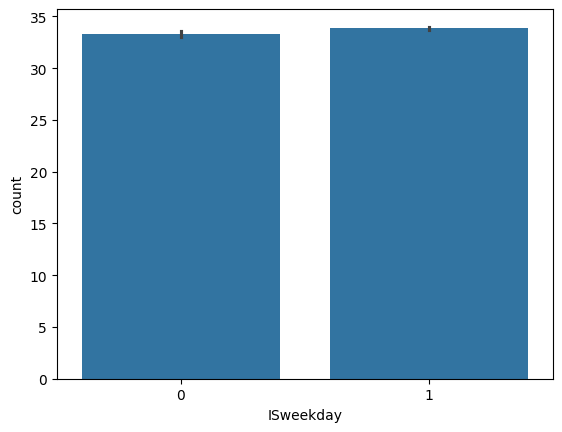

In [67]:
sns.barplot(x='ISweekday', y='count', data=df)
plt.show()

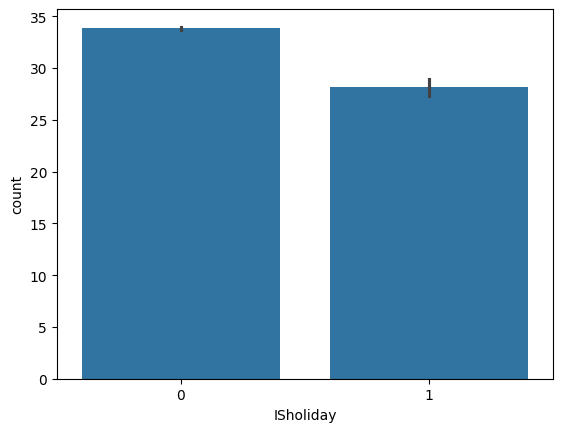

In [68]:
sns.barplot(x='ISholiday', y='count', data=df)
plt.show()

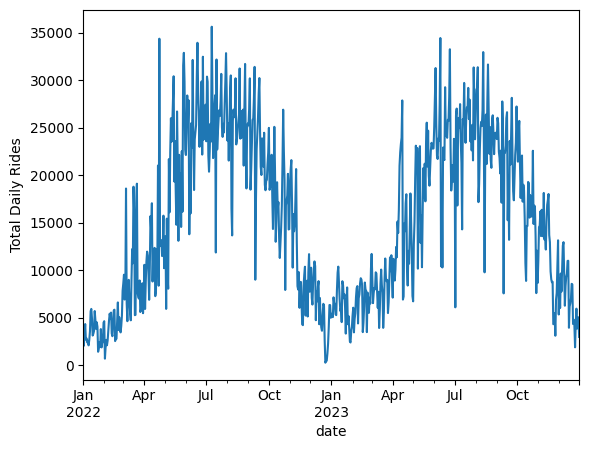

<Figure size 2000x1000 with 0 Axes>

In [76]:
# time distribution with agg sum of rides per day
df['date'] = pd.to_datetime(df['date'])

daily_rides = df.groupby('date')['count'].sum()

daily_rides.plot()

plt.ylabel('Total Daily Rides')
plt.figure(figsize=(20, 10))
plt.show()

/tmp/ipykernel_5488/950685622.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hour', y='count', data=df, estimator=sum, ci=None)


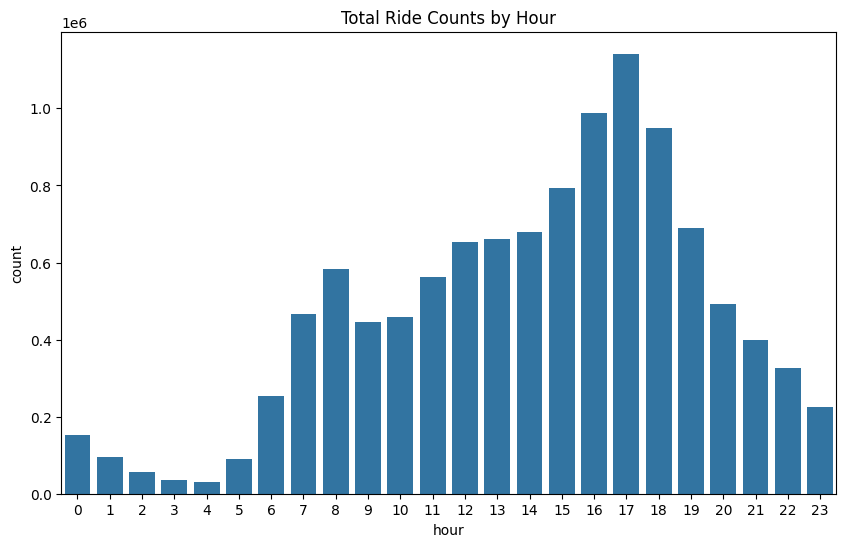

In [79]:
# Hourly distribution of rides per hour
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='count', data=df, estimator=sum, ci=None)
plt.title('Total Ride Counts by Hour')
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


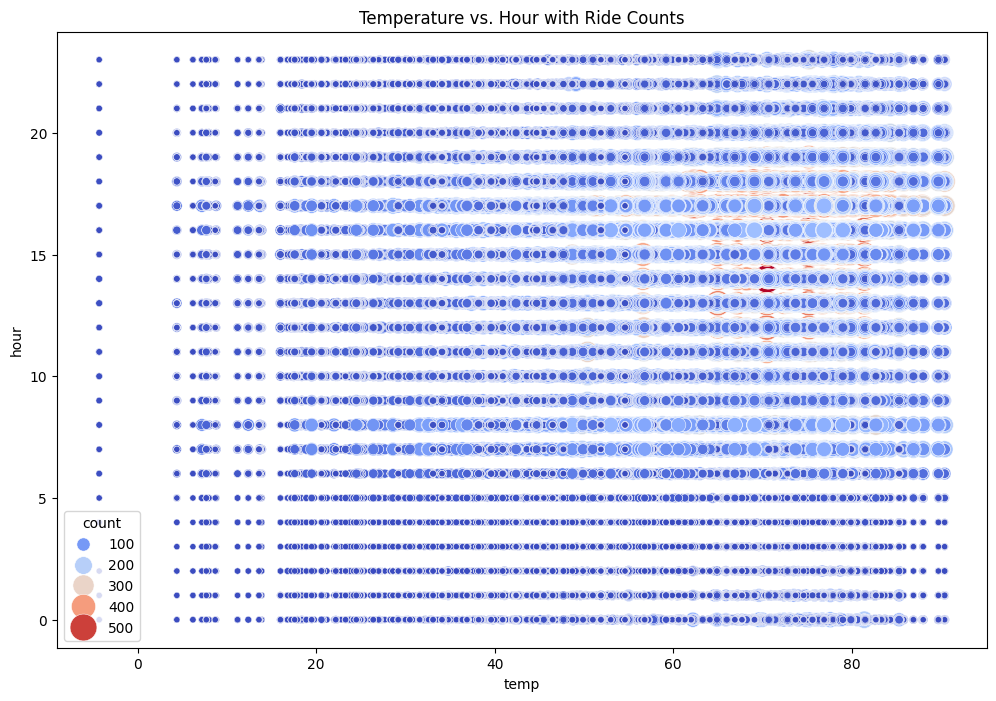

In [82]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='temp', y='hour', hue='count', data=df, palette='coolwarm', size='count', sizes=(20, 400))
plt.title('Temperature vs. Hour with Ride Counts')
plt.show()

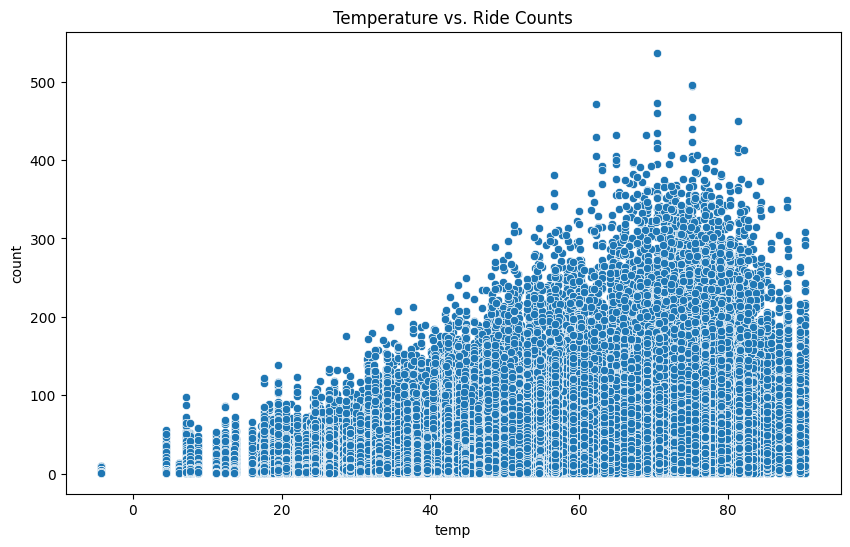

In [83]:
# Weather Conditions Analysis

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count', data=df)
plt.title('Temperature vs. Ride Counts')
plt.show()


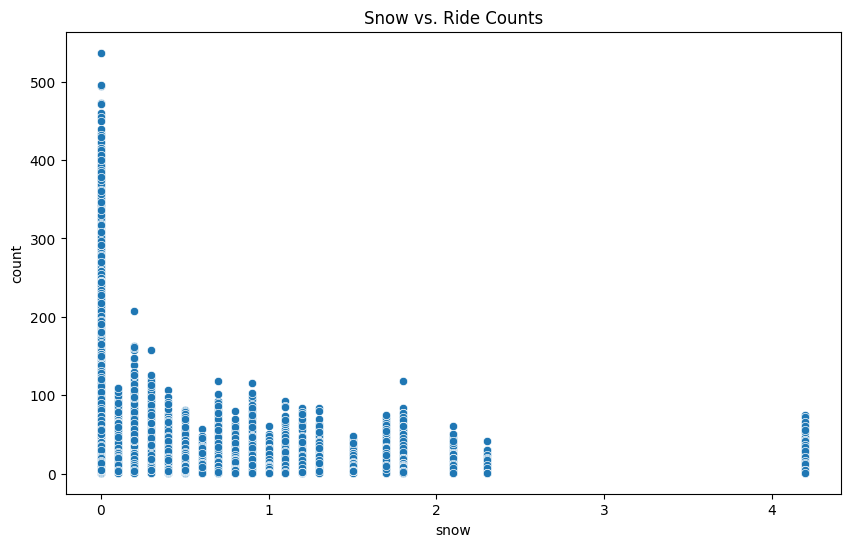

In [84]:

# Snow vs Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='snow', y='count', data=df)
plt.title('Snow vs. Ride Counts')
plt.show()



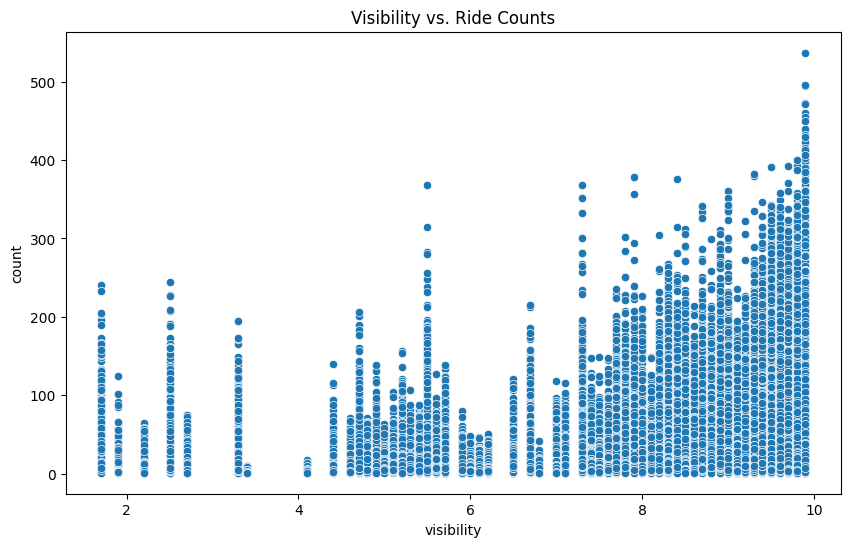

In [85]:
# Visibility vs Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visibility', y='count', data=df)
plt.title('Visibility vs. Ride Counts')
plt.show()

In [86]:
df

,rideable_type,member_casual,date,hour,start_in_hot_zones,end_in_hot_zones,at_stations,count,ISweekday,ISholiday,temp,snow,visibility
0,classic_bike,casual,2022-01-01,0,0.0,0.0,1,22,0,1,34.8,0.3,4.6
1,classic_bike,casual,2022-01-01,0,0.0,1.0,1,7,0,1,34.8,0.3,4.6
2,classic_bike,casual,2022-01-01,0,1.0,0.0,1,6,0,1,34.8,0.3,4.6
3,classic_bike,casual,2022-01-01,0,1.0,1.0,1,14,0,1,34.8,0.3,4.6
4,classic_bike,casual,2022-01-01,1,0.0,0.0,0,2,0,1,34.8,0.3,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333304,electric_bike,member,2023-12-31,23,0.0,0.0,1,9,0,0,34.1,0.6,7.8
333305,electric_bike,member,2023-12-31,23,0.0,1.0,1,2,0,0,34.1,0.6,7.8
333306,electric_bike,member,2023-12-31,23,1.0,0.0,1,1,0,0,34.1,0.6,7.8
333307,electric_bike,member,2023-12-31,23,1.0,1.0,0,12,0,0,34.1,0.6,7.8


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333309 entries, 0 to 333308
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       333309 non-null  category      
 1   member_casual       333309 non-null  category      
 2   date                333309 non-null  datetime64[ns]
 3   hour                333309 non-null  int64         
 4   start_in_hot_zones  333309 non-null  category      
 5   end_in_hot_zones    333309 non-null  category      
 6   at_stations         333309 non-null  category      
 7   count               333309 non-null  int64         
 8   ISweekday           333309 non-null  category      
 9   ISholiday           333309 non-null  category      
 10  temp                333309 non-null  float64       
 11  snow                333309 non-null  float64       
 12  visibility          333309 non-null  float64       
dtypes: category(7), datetime64[ns

In [88]:
df = df.drop(columns=['hour']) # as we are focused on daily rides usage.

In [89]:
## Agreegating data as we are working in predicting daily bike usage given some factors


daily_data = df.groupby('date').agg({
    'count': 'sum',  # Summing up all rides per day
    'temp': 'mean',  # Average temperature
    'snow': 'mean',  # Average snowfall
    'visibility': 'mean',  # Average visibility
    # For categorical data
    'rideable_type': lambda x: x.mode()[0] if not x.mode().empty else np.NaN,
    'member_casual': lambda x: x.mode()[0] if not x.mode().empty else np.NaN,
    'start_in_hot_zones': lambda x: x.mode()[0] if not x.mode().empty else np.NaN,
    'end_in_hot_zones': lambda x: x.mode()[0] if not x.mode().empty else np.NaN,
    'at_stations': lambda x: x.mode()[0] if not x.mode().empty else np.NaN,
    'ISweekday': lambda x: x.mode()[0] if not x.mode().empty else np.NaN,
    'ISholiday': lambda x: x.mode()[0] if not x.mode().empty else np.NaN,
}).reset_index()

daily_data.head()


,date,count,temp,snow,visibility,rideable_type,member_casual,start_in_hot_zones,end_in_hot_zones,at_stations,ISweekday,ISholiday
0,2022-01-01,2530,34.8,0.3,4.6,electric_bike,member,0.0,0.0,1,0,1
1,2022-01-02,2047,23.5,1.7,7.9,electric_bike,member,0.0,0.0,1,0,0
2,2022-01-03,3119,17.2,0.7,9.9,electric_bike,member,0.0,0.0,1,1,0
3,2022-01-04,4334,29.8,0.0,9.9,electric_bike,member,0.0,0.0,1,1,0
4,2022-01-05,2698,19.7,0.0,6.1,electric_bike,member,0.0,0.0,1,1,0


In [90]:
daily_data.tail()

,date,count,temp,snow,visibility,rideable_type,member_casual,start_in_hot_zones,end_in_hot_zones,at_stations,ISweekday,ISholiday
725,2023-12-27,5954,38.2,0.0,9.9,electric_bike,member,0.0,0.0,1,1,0
726,2023-12-28,3860,40.0,0.0,6.2,electric_bike,member,0.0,0.0,1,1,0
727,2023-12-29,4839,39.6,0.0,5.9,electric_bike,member,0.0,0.0,1,1,0
728,2023-12-30,5046,33.1,0.0,8.3,electric_bike,member,0.0,0.0,1,0,0
729,2023-12-31,2978,34.1,0.6,7.8,electric_bike,member,0.0,0.0,1,0,0


In [92]:
daily_data.to_csv('/workspaces/707-group-project-ht6631/project-checkpoint2/data/daily_data.csv', header=True, index=False)

In [96]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                730 non-null    datetime64[ns]
 1   count               730 non-null    int64         
 2   temp                730 non-null    float64       
 3   snow                730 non-null    float64       
 4   visibility          730 non-null    float64       
 5   rideable_type       730 non-null    category      
 6   member_casual       730 non-null    category      
 7   start_in_hot_zones  730 non-null    category      
 8   end_in_hot_zones    730 non-null    category      
 9   at_stations         730 non-null    category      
 10  ISweekday           730 non-null    category      
 11  ISholiday           730 non-null    category      
dtypes: category(7), datetime64[ns](1), float64(3), int64(1)
memory usage: 34.5 KB


## Modelling

In [97]:
X = data[['temp', 'snow', 'visibility', 'rideable_type',
       'member_casual', 'start_in_hot_zones', 'end_in_hot_zones',
       'at_stations', 'ISweekday', 'ISholiday']]
y = data['count']

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_features = ['temp','visibility', 'snow']

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

cat_features = ['rideable_type', 'member_casual', 'start_in_hot_zones', 'end_in_hot_zones', 'at_stations', 'ISweekday', 'ISholiday']
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)])



In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


linearmodel = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())])

linearmodel.fit(X_train, y_train)


y_pred = linearmodel.predict(X_test)


r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2}")
print(f"RMSE: {rmse}")

R²: 0.21236093066544748
RMSE: 37.80389859888242


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rfmodel = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', RandomForestRegressor(n_estimators=100, random_state=42))])


rfmodel.fit(X_train, y_train)


y_pred = rfmodel.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 34.05602797536634


In [102]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np


knn_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', KNeighborsRegressor(n_neighbors=5))])


knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)


rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f'KNN RMSE: {rmse_knn}')


KNN RMSE: 36.34798896694473


In [103]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np



dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', DecisionTreeRegressor(random_state=42))])


dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)


rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'Decision Tree RMSE: {rmse_dt}')


Decision Tree RMSE: 34.04373382857365


In [105]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np


svr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR(C=1.0, epsilon=0.1)) 
])


svr_model.fit(X_train, y_train)


y_pred_svr = svr_model.predict(X_test)


rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f'SVR RMSE: {rmse_svr}')


## Problems & Challenges

1. Picking useful features
2. Converting existing data types to proper data types
3. Sourcing of right weather data


## Next steps
We are going to further work on modeling (Tuning the models to get good RMSE) during the week of check point 2. Hopefully finish code work in 2 weeks and start to work on presentation and paper works.\
If the regression result of bike usage is not satisfying enough, we may potray this as a forcasting problem.